In [1]:
import numpy as np
import os
from PIL import Image
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from timeit import default_timer as timer
import cv2
import seaborn as sns
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

import cnn_models as cnn

2025-02-25 23:10:51.305443: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740496251.319652   17252 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740496251.323576   17252 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-25 23:10:51.338666: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#Set GPU Allocation
gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
      
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


I0000 00:00:1739688569.305547     479 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9706 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6


## START OF THE TRAINING PROCESS

In [2]:
# Define the base directory
# Rice Bran
#base_dir_rb = '/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Rice Bran/Training and Validation/Set 3'
base_dir_rb = '/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Rice Bran/Training and Validation/Set 4'

# Define the subdirectories for each type
pure_rb_dir = os.path.join(base_dir_rb, 'Pure')
adulterated_rb_dir = os.path.join(base_dir_rb, 'Adulterated')

# Soybean Meal
#base_dir = '/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Soybean Meal/Training and Validation/Set 2'
#base_dir = '/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Soybean Meal/Training and Validation/Set 1'
base_dir_sbm = '/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Soybean Meal/Training and Validation/Set 3'

# Define the subdirectories for each type
pure_sbm_dir = os.path.join(base_dir_sbm, 'Pure')
adulterated_sbm_dir = os.path.join(base_dir_sbm, 'Adulterated')

# Corn
# base_dir = '/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Corn/Training and Validation/Set 2'
base_dir_corn = '/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Corn/Training and Validation/Set 3'

# Define the subdirectories for each type
pure_corn_dir = os.path.join(base_dir_corn, 'Pure')
adulterated_corn_dir = os.path.join(base_dir_corn, 'Adulterated')


# image_path = os.path.join(adulterated_rb_dir, 'Adulterated_original_image (13).jpg_4a486883-be2c-414c-9d5e-0545d28807d8.jpg')
# img = mpimg.imread(image_path)
# print(img.shape)
# plt.imshow(img)
# plt.show()


### Data Splitting

In [3]:
def split_data(base_dir):
    train_ds = tf.keras.preprocessing.image_dataset_from_directory(
        base_dir,
        validation_split=0.2,
        subset='training',
        seed = 123,
        label_mode='binary',
        image_size=(400, 400),
        batch_size=32,
        shuffle=True
    )

    validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
        base_dir,
        validation_split=0.2,
        subset='validation',
        seed = 123,
        label_mode='binary',
        image_size=(400, 400),
        batch_size=32,
        shuffle=False
    )

    # class_names = train_ds.class_names
    # print(class_names)

    return [train_ds, validation_ds]

### Training Process With Different Types of CNN Architecture

In [4]:
def train_data(model_type, epoch, lr, train_ds, validation_ds):
    start = timer()

    # Custom CNN Model
    model = model_type
    model.compile(optimizer=Adam(learning_rate=lr), 
                        loss='binary_crossentropy', 
                        metrics=['accuracy'])

    model_history = model.fit(x = train_ds, validation_data=validation_ds, epochs=epoch)
    print('Total Time consumed for ' + str(epoch) + ' --->', timer()-start)

    return model_history

#### Base Directories of each ingredients

In [ ]:
rb_data = split_data(base_dir_rb)
sbm_data = split_data(base_dir_sbm)
corn_data = split_data(base_dir_corn)

#### Custom CNN Model

In [ ]:
# view model summary
cnn.CustomModel().summary()

# Create model for Rice Bran
custom_rb_model = cnn.CustomModel()

custom_rb_history = train_data(custom_rb_model, 15, 0.0001, rb_data[0], rb_data[1])



/home/cs_root/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1740496271.738704   17252 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9706 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 398, 398, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 398, 398, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 199, 199, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 197, 197, 64)   │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 197, 197, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 98, 98, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 614656)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 614656)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    78,676,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 78,754,369 (300.42 MB)

 Trainable params: 78,753,985 (300.42 MB)

 Non-trainable params: 384 (1.50 KB)

Found 4000 files belonging to 2 classes.
Using 3200 files for training.
Found 4000 files belonging to 2 classes.
Using 800 files for validation.
Epoch 1/15


I0000 00:00:1740496283.736836   17326 service.cc:148] XLA service 0x7f604000eb30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1740496283.736877   17326 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2025-02-25 23:11:23.806284: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1740496284.050411   17326 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-02-25 23:11:33.637582: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[32,128,199,199]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,64,197,197]{3,2,1,0}, f32[64,128,3,3]{3,2,1,0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardInput", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alp

100/100 ━━━━━━━━━━━━━━━━━━━━ 55s 343ms/step - accuracy: 0.7827 - loss: 3.5561 - val_accuracy: 1.0000 - val_loss: 0.2803
Epoch 2/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 288ms/step - accuracy: 0.9538 - loss: 0.3884 - val_accuracy: 0.9950 - val_loss: 0.3065
Epoch 3/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 282ms/step - accuracy: 0.9803 - loss: 0.3221 - val_accuracy: 0.9975 - val_loss: 0.2760
Epoch 4/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 283ms/step - accuracy: 0.9882 - loss: 0.2960 - val_accuracy: 0.9975 - val_loss: 0.2698
Epoch 5/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 282ms/step - accuracy: 0.9895 - loss: 0.2931 - val_accuracy: 0.9850 - val_loss: 0.3024
Epoch 6/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 280ms/step - accuracy: 0.9904 - loss: 0.2742 - val_accuracy: 0.9388 - val_loss: 0.4089
Epoch 7/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 285ms/step - accuracy: 0.9871 - loss: 0.2709 - val_accuracy: 0.9975 - val_loss: 0.2433
Epoch 8/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 279ms/step - accuracy: 0.9804 - loss: 0.3010 - val

#### Evaluate Model

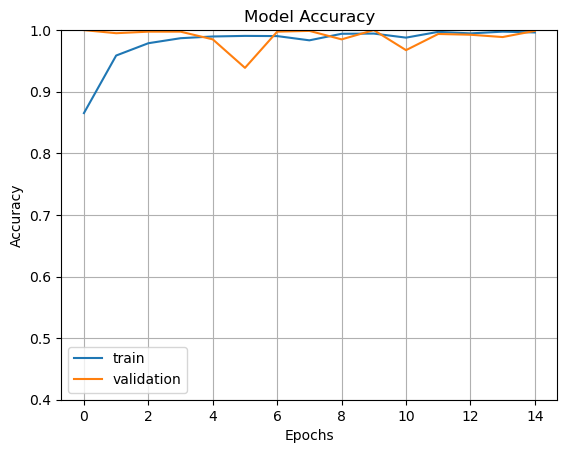

In [6]:
fig_one = plt.gcf()

# Model Accuracy
plt.plot(custom_rb_history.history['accuracy'])
plt.plot(custom_rb_history.history['val_accuracy'])
plt.axis(ymin=0.4, ymax = 1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

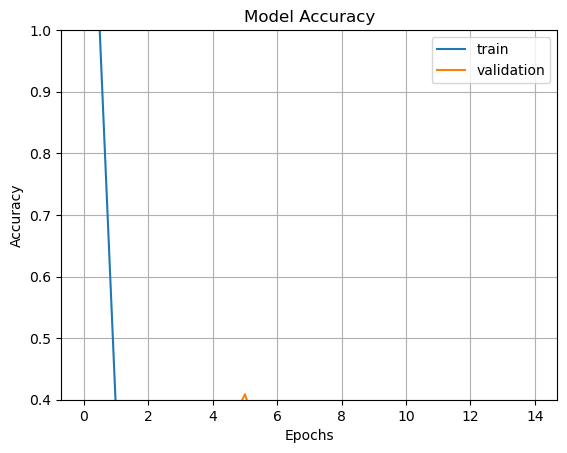

In [7]:
# Model Loss
plt.plot(custom_rb_history.history['loss'])
plt.plot(custom_rb_history.history['val_loss'])
plt.axis(ymin=0.4, ymax = 1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

#### ResNet-50 Model

In [9]:
# view model summary
cnn.ResNetModel(120).summary()

# Rice Bran
resnet_rb_model = cnn.ResNetModel(120)
resnet_rb_history = train_data(resnet_rb_model, 15, 0.0001, rb_data[0], rb_data[1])

# Fine-tuning (Unfreeze Top Layers)
# pretrained_model = resnet_model.layers[0] # Get the ResNet50 model

# # Unfreeze some top layers (experiment with the number)
# for layer in pretrained_model.layers[170:]:  # Unfreeze from layer n onwards (adjust)
#     layer.trainable = True

# # Important: Recompile the model after changing trainable status
# resnet_model.compile(optimizer=Adam(learning_rate=1e-5),  # Very low learning rate for fine-tuning
#                     loss='binary_crossentropy', 
#                     metrics=['accuracy'])

# resnet50_model_history = resnet_model.fit(x = train_ds, validation_data=validation_ds, epochs=3)
# print('Total Time consumed for ' + str(epoch) + ' epoch/s --->', timer()-start)

Model: "functional_22"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 400, 400,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 406, 406,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 200, 200,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 200, 200,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 200, 200,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 202, 202,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 100, 100,  │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 100, 100,  │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 100, 100,  │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 100, 100,  │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 100, 100,  │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 100, 100,  │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 100, 100,  │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 100, 100,  │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 100, 100,  │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 100, 100,  │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 100, 100,  │      1,024 │ conv2_block1_3_c

 Total params: 23,867,009 (91.05 MB)

 Trainable params: 17,490,433 (66.72 MB)

 Non-trainable params: 6,376,576 (24.32 MB)

Epoch 1/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 64s 310ms/step - accuracy: 0.8056 - loss: 0.7453 - val_accuracy: 1.0000 - val_loss: 0.3499
Epoch 2/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 309ms/step - accuracy: 0.9888 - loss: 0.3933 - val_accuracy: 1.0000 - val_loss: 0.3310
Epoch 3/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 291ms/step - accuracy: 0.9915 - loss: 0.3638 - val_accuracy: 1.0000 - val_loss: 0.3180
Epoch 4/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 277ms/step - accuracy: 0.9983 - loss: 0.3381 - val_accuracy: 1.0000 - val_loss: 0.3124
Epoch 5/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 285ms/step - accuracy: 0.9979 - loss: 0.3297 - val_accuracy: 1.0000 - val_loss: 0.3070
Epoch 6/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 287ms/step - accuracy: 0.9987 - loss: 0.3220 - val_accuracy: 1.0000 - val_loss: 0.2995
Epoch 7/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 283ms/step - accuracy: 0.9992 - loss: 0.3079 - val_accuracy: 1.0000 - val_loss: 0.2903
Epoch 8/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 286ms/step - accuracy: 0.9993 - loss: 0

#### Evaluate Model

In [ ]:
# 1. Get predictions (probabilities)
#train_predictions = resnet_model.predict(train_ds)
val_predictions = resnet_model.predict(validation_ds)

# 2. Convert probabilities to labels (0 or 1)
def get_true_labels(dataset):
    all_labels = []
    for x, y in dataset:  # Iterate through the dataset
        if isinstance(y, np.ndarray):  # Check if y is already a NumPy array
            all_labels.extend(y)
        else:
            all_labels.extend(np.array(y)) # Convert to numpy array if it's a list or tuple
    return np.array(all_labels)

#train_labels = get_true_labels(train_ds)
val_labels = get_true_labels(validation_ds)

train_predicted_labels = (train_predictions > 0.5).astype(int)  # Assuming binary classification
val_predicted_labels = (val_predictions > 0.5).astype(int)

# 3. Calculate and print metrics
def calculate_and_print_metrics(true_labels, predicted_labels, set_name):
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, zero_division=1)
    recall = recall_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)
    cm = confusion_matrix(true_labels, predicted_labels)

    print(f"--- {set_name} Set Metrics ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}")
    return accuracy, precision, recall, f1

train_accuracy, train_precision, train_recall, train_f1 = calculate_and_print_metrics(train_labels, train_predicted_labels, "Training")
val_accuracy, val_precision, val_recall, val_f1 = calculate_and_print_metrics(val_labels, val_predicted_labels, "Validation")


# Print the metrics (you can customize this part)
print("\n--- Overall Results ---")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Training F1-score: {train_f1:.4f}")
print(f"Validation F1-score: {val_f1:.4f}")

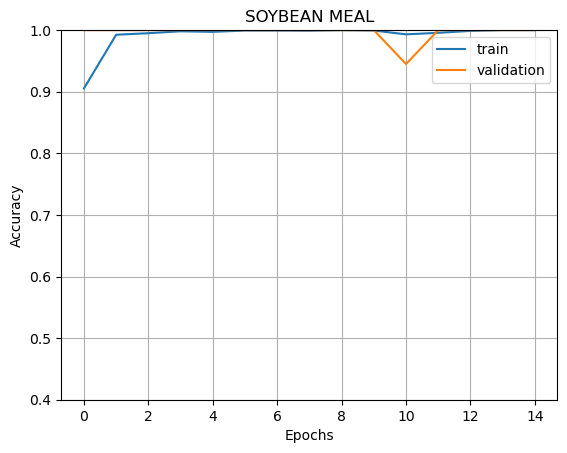

In [10]:
fig_one = plt.gcf()

# Model Accuracy
plt.plot(resnet_rb_history.history['accuracy'])
plt.plot(resnet_rb_history.history['val_accuracy'])
plt.axis(ymin=0.4, ymax = 1)
plt.grid()
#plt.title('RICE BRAN')
plt.title('SOYBEAN MEAL')
#plt.title('GROUND CORN')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

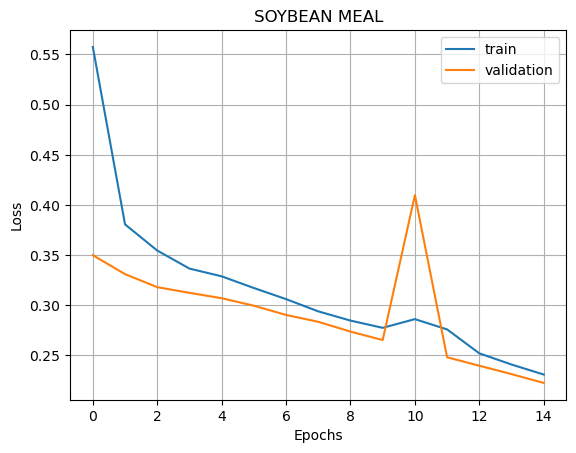

In [11]:
# Model Loss
plt.plot(resnet_rb_history.history['loss'])
plt.plot(resnet_rb_history.history['val_loss'])
plt.grid()
#plt.title('RICE BRAN')
plt.title('SOYBEAN MEAL')
#plt.title('GROUND CORN')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

## TESTING THE MODEL

In [12]:
# Testing Dataset Directory
# Rice Bran
#test_dir = '/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Rice Bran/Testing/Set 3'
#test_dir = '/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Rice Bran/Testing/Set 2'
test_dir = '/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Rice Bran/Testing/Set 4'

# Soybean Meal
#test_dir = '/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Soybean Meal/Testing/Set 2'
#test_dir = '/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Soybean Meal/Testing/Set 1'

# Corn
#test_dir = '/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Corn/Testing/Set 2'
#test_dir = '/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Corn/Testing/Set 1'

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(400, 400),
    batch_size=32,
    label_mode='binary',
    shuffle=False
)

Found 600 files belonging to 2 classes.


### Evaluate Custom Model

19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 351ms/step - accuracy: 0.9959 - loss: 0.2122
Test Loss: 0.205863356590271
Test Accuracy: 0.9983333349227905


2025-02-25 23:31:18.355480: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step
Classification Report:
              precision    recall  f1-score   support

 Adulterated       1.00      1.00      1.00       300
        Pure       1.00      1.00      1.00       300

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600

Precision: 0.9966777408637874
Recall: 1.0
F1 Score: 0.9983361064891847


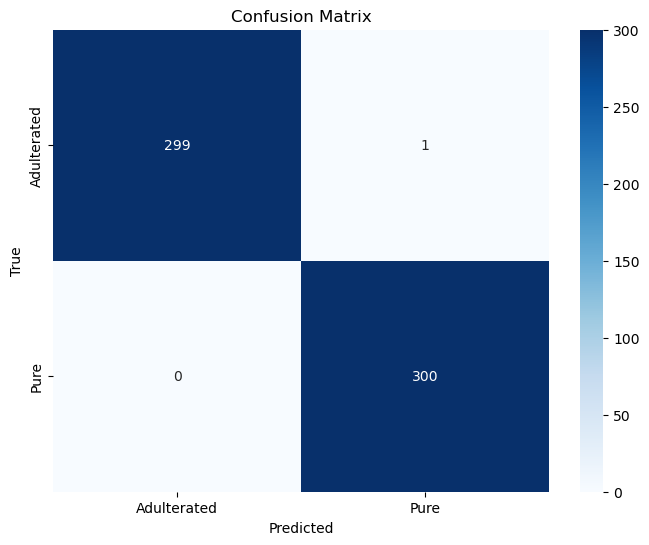

In [13]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = custom_rb_model.evaluate(test_ds)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Generate predictions
y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred = custom_rb_model.predict(test_ds)
y_pred = (y_pred > 0.5).astype(int)  # For binary classification

# Compute evaluation metrics
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=["Adulterated", "Pure"]))

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Adulterated', 'Pure'], yticklabels=['Adulterated', 'Pure'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Evaluate ResNet Model

19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 436ms/step - accuracy: 1.0000 - loss: 0.2225
Test Loss: 0.22264587879180908
Test Accuracy: 1.0


2025-02-25 23:31:48.445648: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 300ms/step
Classification Report:
              precision    recall  f1-score   support

 Adulterated       1.00      1.00      1.00       300
        Pure       1.00      1.00      1.00       300

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600

Precision: 1.0
Recall: 1.0
F1 Score: 1.0


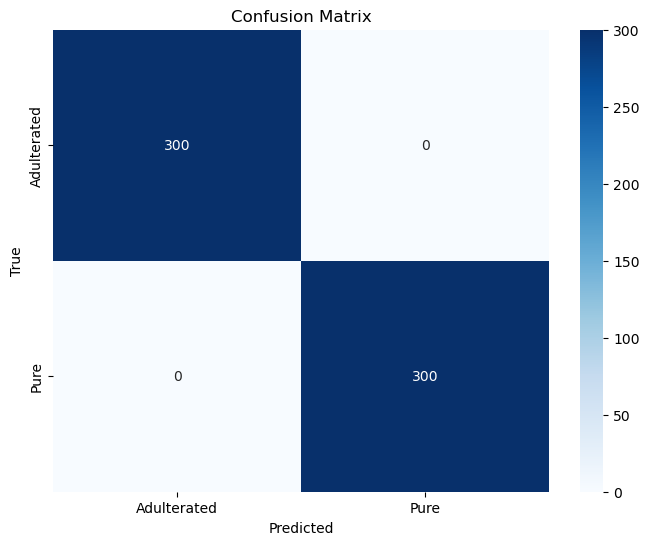

In [14]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = resnet_rb_model.evaluate(test_ds)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Generate predictions
y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred = resnet_rb_model.predict(test_ds)
y_pred = (y_pred > 0.5).astype(int)  # For binary classification

# Compute evaluation metrics
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=["Adulterated", "Pure"]))

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Adulterated', 'Pure'], yticklabels=['Adulterated', 'Pure'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Save the Model

In [68]:
# Save the entire model
# Rice Bran
#resnet_model.save('/mnt/c/Users/Room201B/Documents/Salem - Thesis/Saved Models/Rice Bran/set3_rb_resnet_12.h5')
#custom_model.save('/mnt/c/Users/Room201B/Documents/Salem - Thesis/Saved Models/Rice Bran/set3_rb_custom_7.h5')

# Soybean Meal
resnet_model.save('/mnt/c/Users/Room201B/Documents/Salem - Thesis/Saved Models/Soybean Meal/set1_sbm_resnet_3.h5')

# Corn
#resnet_model.save('/mnt/c/Users/Room201B/Documents/Salem - Thesis/Saved Models/Corn/set2_corn_resnet_2.h5')